In [ ]:

# Basic
import numpy as np
import pandas as pd
import seaborn as sns

# Viz
import matplotlib.pyplot as plt


# Warning
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv(r'C:\Users\Hewlett Packard\Desktop\SAYA\project-3-ml-bigmart-sales-demand\data\bigmart.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


># EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

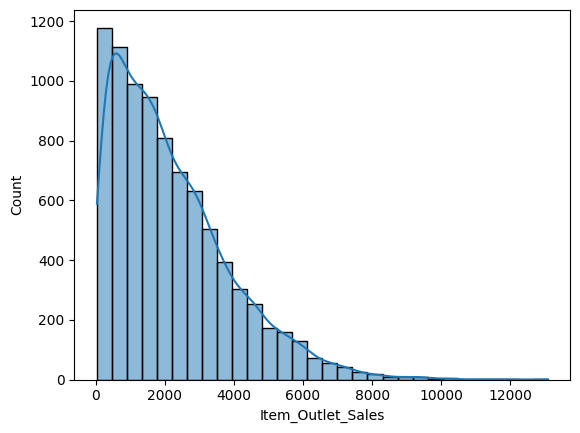

In [6]:
sns.histplot(data=df, x="Item_Outlet_Sales", bins=30, kde=True)

# Sales VS Outlet Related Features

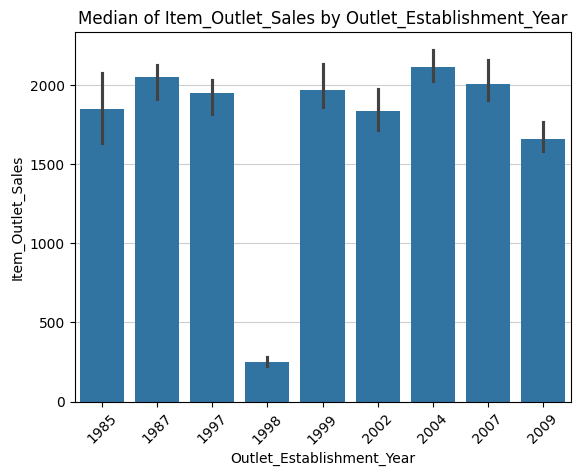

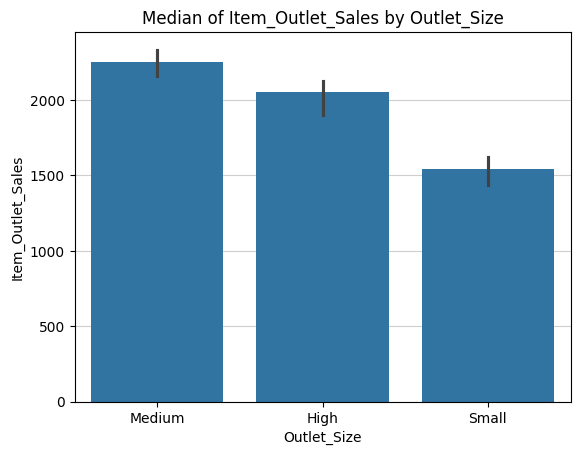

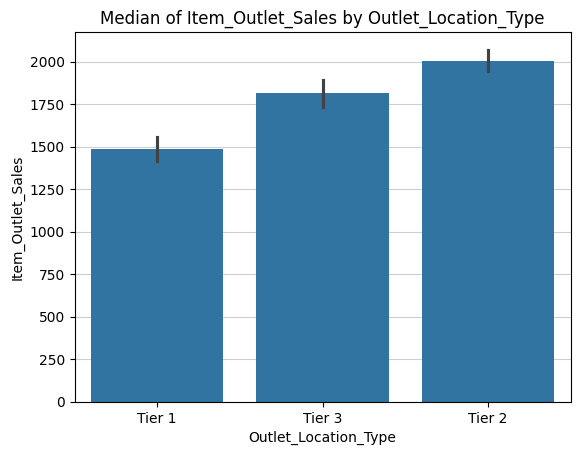

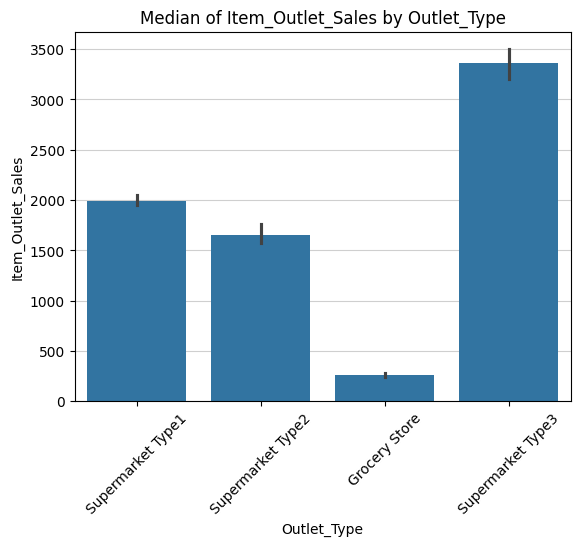

In [7]:
outlet_related_features = [
    "Outlet_Establishment_Year",
    "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"
]
for i in outlet_related_features:
    sns.barplot(data=df, x=i, y="Item_Outlet_Sales", estimator=np.median)
    if i == "Outlet_Establishment_Year" or i == "Outlet_Type":
        plt.xticks(rotation=45)
    else:
        plt.xticks(rotation=0)
    plt.title("Median of Item_Outlet_Sales by " + i)
    plt.grid(axis='y', alpha=0.6)
    plt.gca().set_axisbelow(True)
    plt.show()

* There is no strong relationship between the year an outlet was established and its sales performance. However, outlets opened in 1998 stand out with noticeably different sales compared to others.Therefore, this feature will be excluded from the model to avoid potential data leakage.
* Looking at location, outlets in **Tier 2 areas** achieve higher sales compared to outlets in other location tiers.
* In terms of outlet type, **Supermarket Type3** clearly dominates sales performance. **Supermarket Type1** and **Supermarket Type2** remain competitive with each other, while **Grocery Stores** contribute substantially lower sales.


# Sales VS Item Related Features

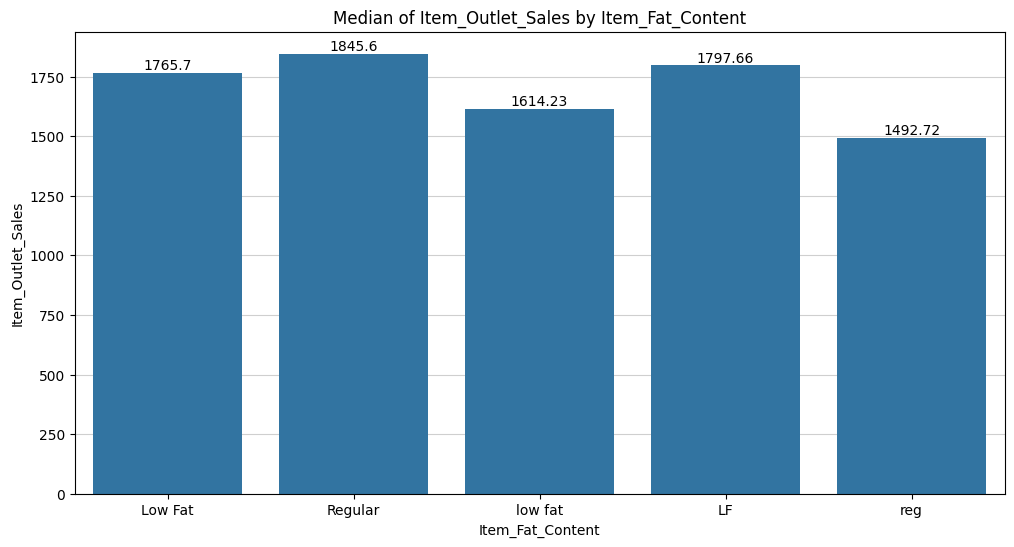

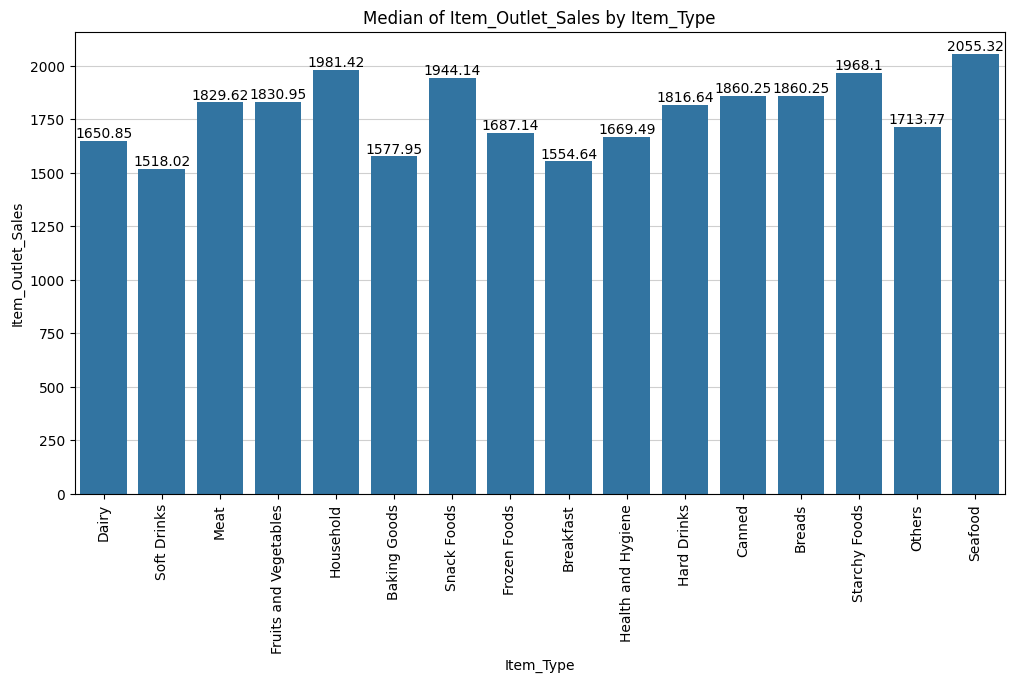

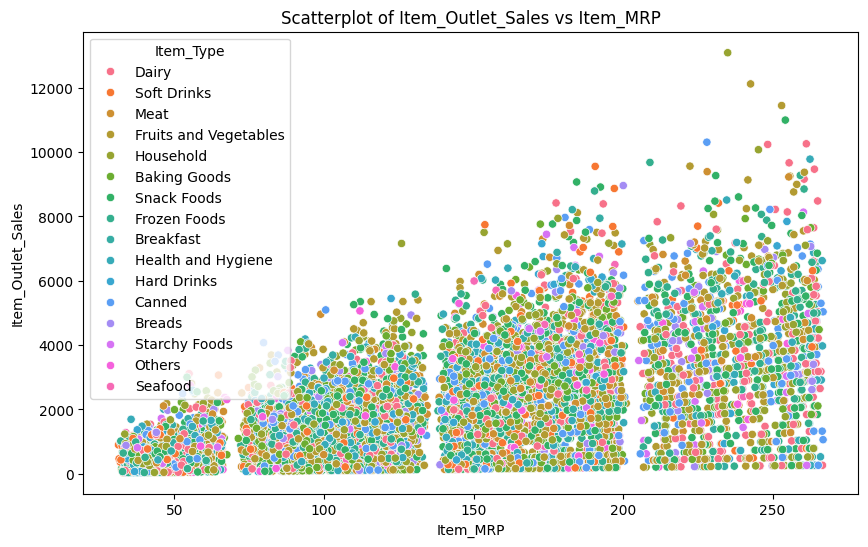

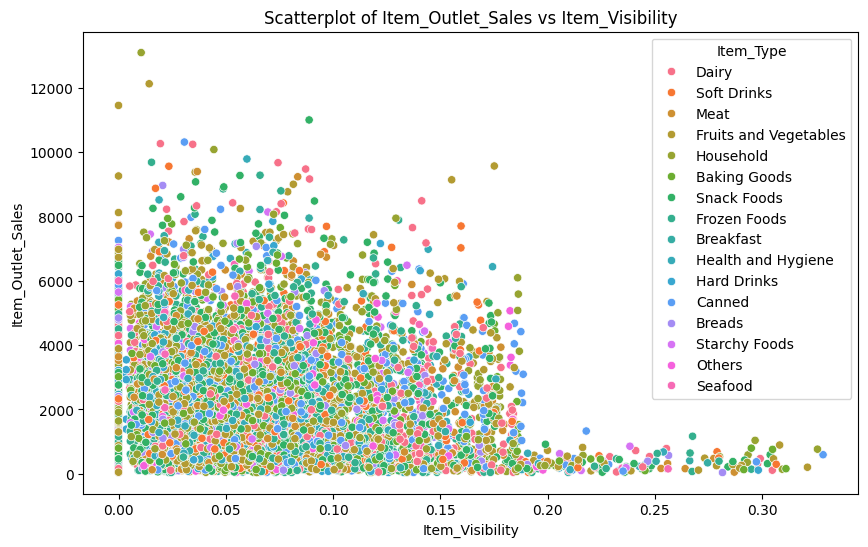

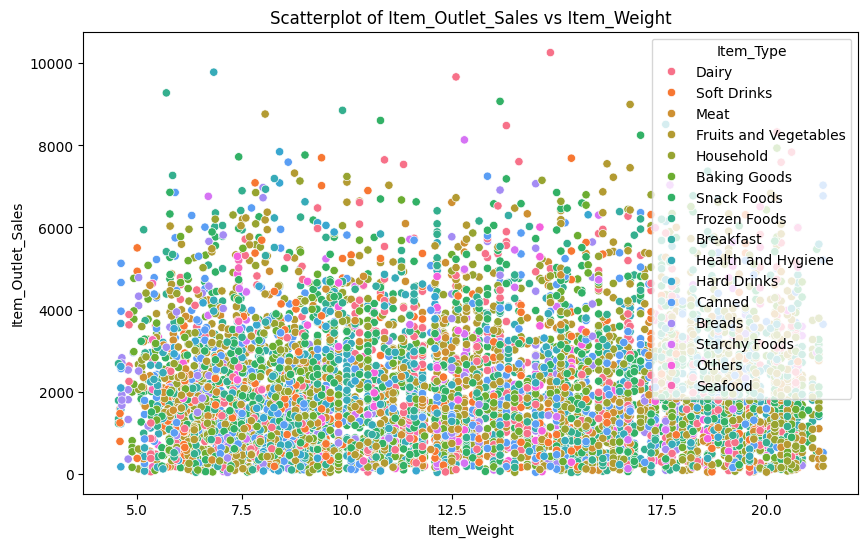

In [8]:
item_related_features = [
    "Item_Fat_Content", "Item_Type", "Item_MRP", "Item_Visibility", "Item_Weight"
] 

for i in item_related_features:
    if df[i].dtype == 'object':
        plt.figure(figsize=(12, 6))
        ax = sns.barplot(data=df, x=i, y="Item_Outlet_Sales", estimator=np.median, errorbar=None)
        for container in ax.containers:
            ax.bar_label(container)
        plt.title("Median of Item_Outlet_Sales by " + i)
        plt.grid(axis='y', alpha=0.6)
        plt.gca().set_axisbelow(True)
        if df[i].nunique() > 10:
            plt.xticks(rotation=90)
        else:
            plt.xticks(rotation=0)
        
    elif df[i].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(
            data=df,
            x=i,
            y="Item_Outlet_Sales",
            hue="Item_Type",
        )
        plt.xlabel(i)
        plt.ylabel('Item_Outlet_Sales')
        plt.title(f"Scatterplot of Item_Outlet_Sales vs {i}")
        plt.show()

        

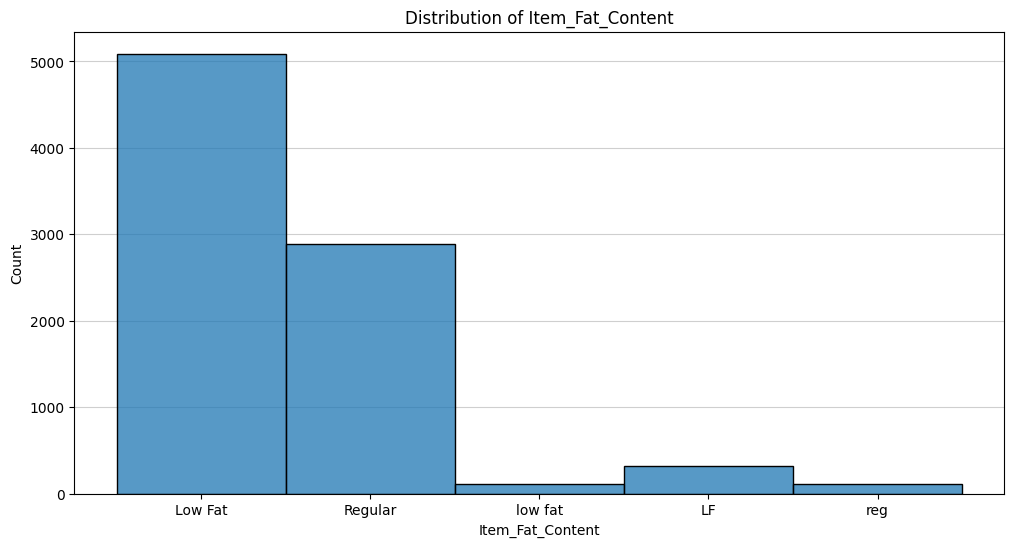

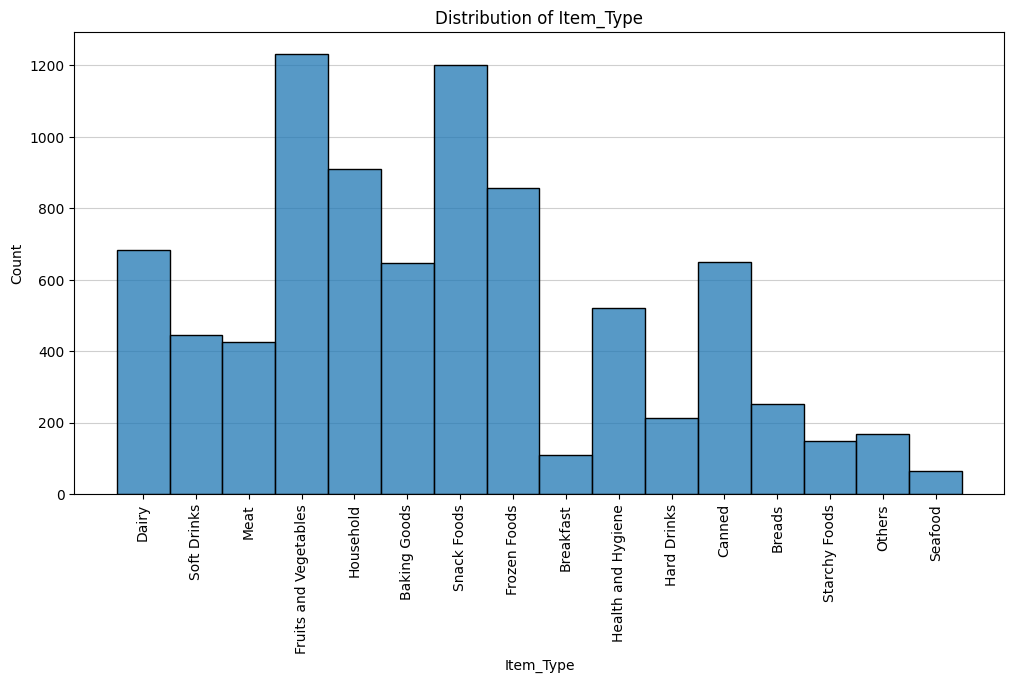

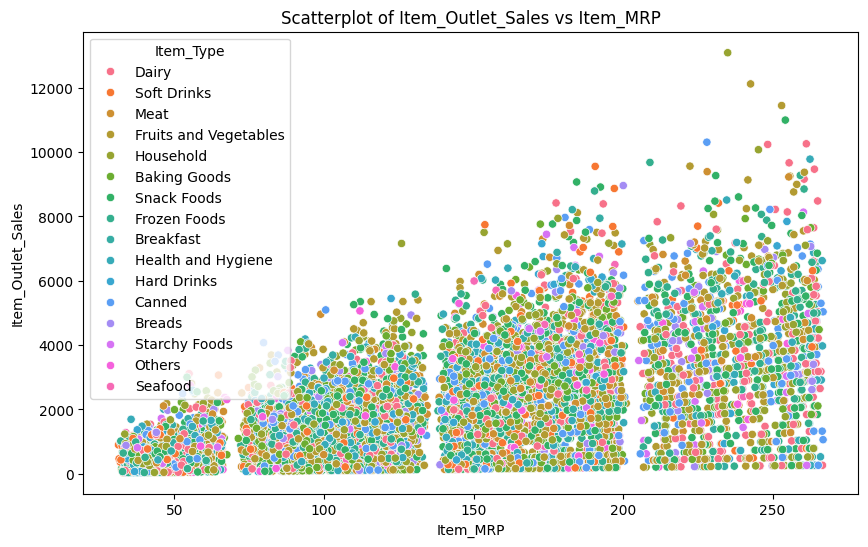

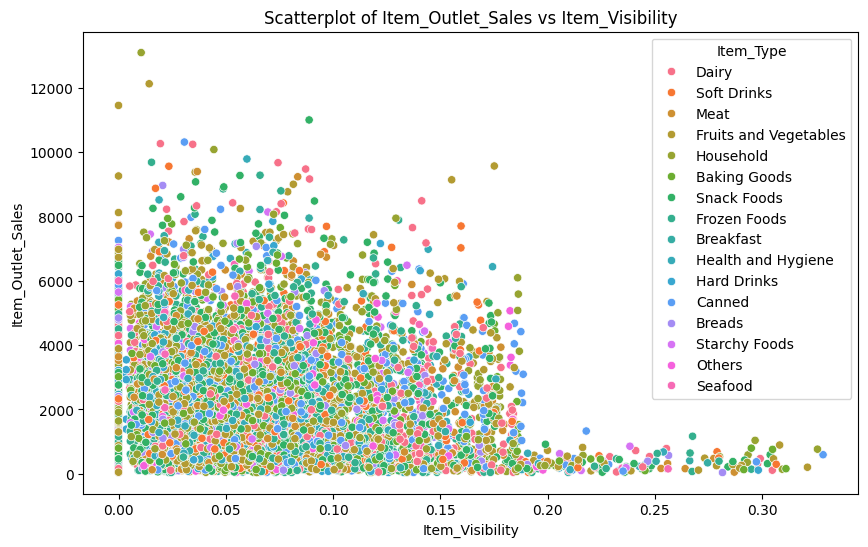

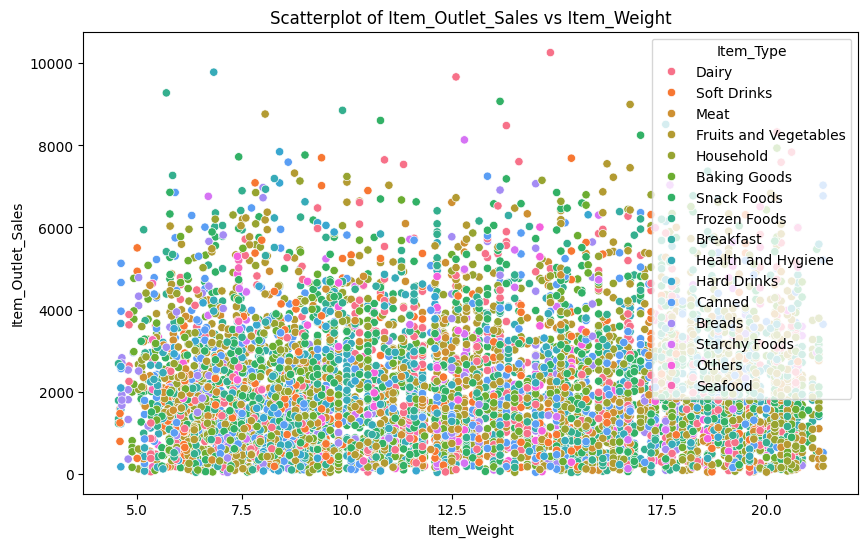

In [18]:
item_related_features = [
    "Item_Fat_Content", "Item_Type", "Item_MRP", "Item_Visibility", "Item_Weight"
] 

for i in item_related_features:
    if df[i].dtype == 'object':
        plt.figure(figsize=(12, 6))
        sns.histplot(df[i])
        plt.title("Distribution of " + i)
        plt.grid(axis='y', alpha=0.6)
        plt.gca().set_axisbelow(True)
        if df[i].nunique() > 10:
            plt.xticks(rotation=90)
        else:
            plt.xticks(rotation=0)
        plt.show()
    elif df[i].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(
            data=df,
            x=i,
            y="Item_Outlet_Sales",
            hue="Item_Type",
        )
        plt.xlabel(i)
        plt.ylabel('Item_Outlet_Sales')
        plt.title(f"Scatterplot of Item_Outlet_Sales vs {i}")
        plt.show()

        

In [10]:
df[df["Item_Visibility"] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,NaN,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680


* `Item_Fat_Content` does not show a significant impact on `Item_Total_Sales`.
* The top three `Item_Type` categories based on `Total_Item_Sales` are **Seafood**, **Household**, and **Starchy Foods**, while the three lowest-performing categories are **Baking Goods**, **Breakfast**, and **Soft Drinks**.
* `Item_MRP` shows a positive correlation with `Item_Total_Sales`. However, the distribution indicates that a higher price does not always guarantee higher total sales.
* `Item_Visibility` shows a negative correlation with `Item_Total_Sales`. This suggests that items with higher visibility do not necessarily achieve higher sales, and visibility alone may not be a strong driver of performance.
* There is no clear pattern indicating a relationship between `Item_Weight` and `Item_Total_Sales`.


## Distribusi `Item_Visibility` dan `Item_MRP`

<Axes: xlabel='Item_Visibility', ylabel='Count'>

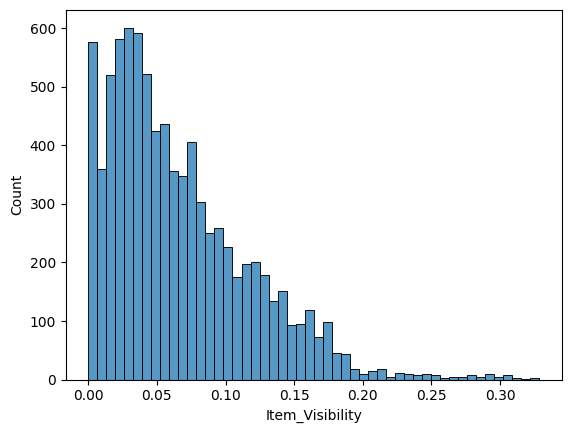

In [11]:
sns.histplot(data=df, x="Item_Visibility")

`Item_Visibility` banyak tersebar pada 0 - 0.05 

<Axes: xlabel='Item_MRP', ylabel='Count'>

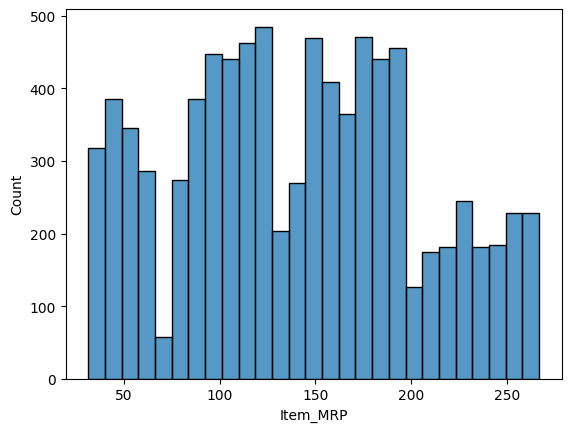

In [12]:
sns.histplot(data=df, x="Item_MRP")

<Axes: xlabel='Item_Weight', ylabel='Count'>

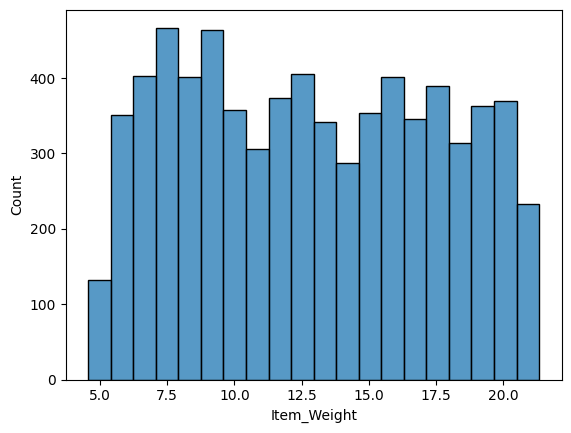

In [13]:
sns.histplot(data=df, x="Item_Weight")

## Korelasi fitur numerik dengan `Item_Total_Sales`

<Axes: >

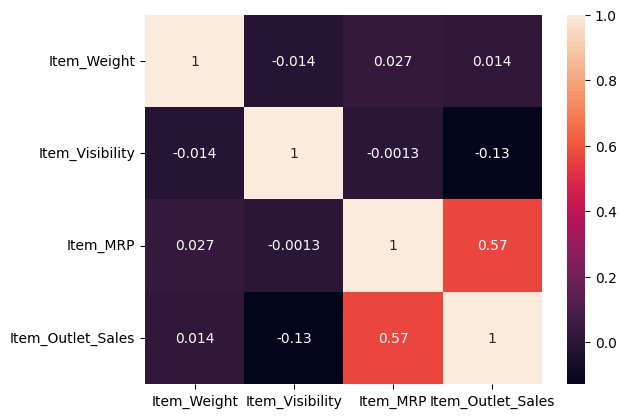

In [14]:
sns.heatmap(df[["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]].corr(), annot=True)

Most features do not show a strong correlation with `Item_Outlet_Sales`, except for `Item_MRP` and `Item_Visibility`.

## EDA Summaries

### In this EDA section, we focused on how the features relate to the target variable. From this analysis, we derived several interesting insights, which we summarize below:

* Based on outlet-related features, most features show certain patterns with respect to the target variable, except for `Outlet_Establishment_Year`, which is concluded to mainly serve as a historical indicator rather than a strong predictive feature. 
* Observing item-related features in relation to `Item_Outlet_Sales`, the categorical features `Item_Fat_Content` and `Item_Type` do not exhibit highly significant differences. For the numerical features, `Item_MRP` shows a positive correlation, while `Item_Visibility` shows a negative correlation. Meanwhile, `Item_Weight` does not display a clear pattern or strong correlation with the target variable.